In [64]:
import pandas as pd 
import numpy as np 
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb


In [2]:
data = pd.read_csv('Dados_do_carga.csv', encoding = 'utf-8',sep=';')
#selecao das colunas do excel
data = data.filter(regex=r'Regiao|w')


In [3]:
data


,Regiao,w0,w1,w2,w3,w4,w5,w6,w7,w8,...,w17,w18,w19,w20,w21,w22,w23,w24,w25,w26
0,1,43.231,41.038,40.694,39.387,40.650,37.688,40.928,39.572,38.564,...,35.221,34.463,34.295,34.007,34.751,35.246,31.881,33.234,33.632,34.161
1,2,11.040,11.130,11.138,11.341,11.347,11.337,11.232,11.307,10.669,...,10.645,10.389,10.074,9.773,9.656,9.962,9.966,9.820,9.535,9.724
2,3,5.462,5.402,5.507,5.591,5.498,5.289,5.428,5.646,5.374,...,5.616,5.605,5.568,5.372,5.323,5.442,5.347,5.360,5.362,5.342
3,4,14.058,12.366,12.593,12.197,12.049,12.197,11.585,11.366,11.357,...,10.461,10.369,10.733,10.546,10.709,10.760,10.534,10.642,10.683,10.671
4,5,73.791,69.936,69.932,68.516,69.544,66.511,69.173,67.891,65.964,...,61.943,60.826,60.670,59.698,60.439,61.410,57.728,59.056,59.212,59.898


In [4]:
melt = data.melt(id_vars = 'Regiao', var_name = 'week', value_name = 'carga')
melt['week'] = melt['week'].str.extract('(\d+)', expand = False).astype(int)
metl = melt.sort_values(['week'])
print(melt.shape)
melt

(135, 3)


,Regiao,week,carga
0,1,0,43.231
1,2,0,11.040
2,3,0,5.462
3,4,0,14.058
4,5,0,73.791
5,1,1,41.038
6,2,1,11.130
7,3,1,5.402
8,4,1,12.366
9,5,1,69.936


In [84]:
melt2 = melt.copy()
melt2['carga_ultima_semana'] = melt2.groupby(['Regiao'])['carga'].shift()
melt2['Diff_carga_ultima_semana'] = melt2.groupby(['Regiao'])['carga_ultima_semana'].diff()
melt2 = melt2.dropna()
melt2.head()

,Regiao,week,carga,carga_ultima_semana,Diff_carga_ultima_semana
10,1,2,40.694,41.038,-2.193
11,2,2,11.138,11.130,0.090
12,3,2,5.507,5.402,-0.060
13,4,2,12.593,12.366,-1.692
14,5,2,69.932,69.936,-3.855


In [16]:
def rmsle(ytrue,ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))
    

In [30]:
mean_error = []
for week in range (18,26):
    train = melt2[melt['week'] < week]
    val = melt2[melt2['week'] == week]
    p = val['carga_ultima_semana'].values
    
    error = rmsle(val['carga'].values, p)
    print('week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

week 18 - Error 0.01631
week 19 - Error 0.01919
week 20 - Error 0.02124
week 21 - Error 0.01389
week 22 - Error 0.01791
week 23 - Error 0.05251
week 24 - Error 0.02189
week 25 - Error 0.01316
Mean Error = 0.02201


C:\Users\alexl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series 

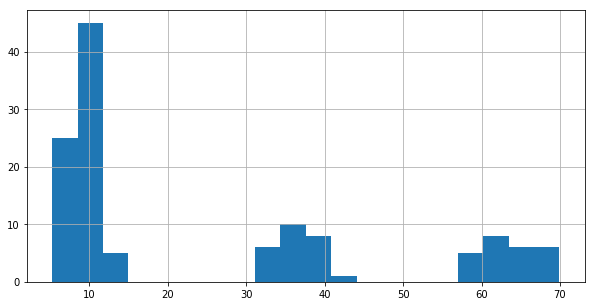

In [69]:
melt2['carga'].hist(bins=20, figsize=(10,5))

In [31]:
mean_error = []
for week in range(18,26):
    train = melt2[melt2['week'] < week]
    val = melt2[melt2['week'] == week]
    
    xtr, xts = train.drop(['carga'], axis=1), val.drop(['carga'], axis=1)
    ytr, yts = train['carga'].values, val['carga'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

week 18 - Error 0.02442
week 19 - Error 0.02381
week 20 - Error 0.02639
week 21 - Error 0.02061
week 22 - Error 0.01568
week 23 - Error 0.04743
week 24 - Error 0.00918
week 25 - Error 0.01547
Mean Error = 0.02287


In [40]:
melt3 = melt.copy()
melt3['carga_ultima_semana'] = melt3.groupby(['Regiao'])['carga'].shift()
melt3['Diff_carga_ultima_semana'] = melt3.groupby(['Regiao'])['carga_ultima_semana'].diff()
melt3['carga_ultima_semana-1'] = melt3.groupby(['Regiao'])['carga'].shift(2)
melt3['Diff_carga_ultima_semana-1'] = melt3.groupby(['Regiao'])['carga_ultima_semana-1'].diff()
melt3 = melt3.dropna()
melt3.head()

,Regiao,week,carga,carga_ultima_semana,Diff_carga_ultima_semana,carga_ultima_semana-1,Diff_carga_ultima_semana-1
15,1,3,39.387,40.694,-0.344,41.038,-2.193
16,2,3,11.341,11.138,0.008,11.130,0.090
17,3,3,5.591,5.507,0.105,5.402,-0.060
18,4,3,12.197,12.593,0.227,12.366,-1.692
19,5,3,68.516,69.932,-0.004,69.936,-3.855


In [42]:
mean_error = []
for week in range(18,26):
    train = melt3[melt3['week'] < week]
    val = melt3[melt3['week'] == week]
    
    xtr, xts = train.drop(['carga'], axis=1), val.drop(['carga'], axis=1)
    ytr, yts = train['carga'].values, val['carga'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

week 18 - Error 0.02544
week 19 - Error 0.02386
week 20 - Error 0.02822
week 21 - Error 0.02000
week 22 - Error 0.01669
week 23 - Error 0.04576
week 24 - Error 0.01047
week 25 - Error 0.01457
Mean Error = 0.02313


In [45]:
melt4 = melt.copy()
melt4['carga_ultima_semana'] = melt4.groupby(['Regiao'])['carga'].shift()
melt4['Diff_carga_ultima_semana'] = melt4.groupby(['Regiao'])['carga_ultima_semana'].diff()
melt4['carga_ultima_semana-1'] = melt4.groupby(['Regiao'])['carga'].shift(2)
melt4['Diff_carga_ultima_semana-1'] = melt4.groupby(['Regiao'])['carga_ultima_semana-1'].diff()
melt4['carga_ultima_semana-2'] = melt4.groupby(['Regiao'])['carga'].shift(3)
melt4['Diff_carga_ultima_semana-2'] = melt4.groupby(['Regiao'])['carga_ultima_semana-2'].diff()
melt4 = melt4.dropna()
melt4.head()

,Regiao,week,carga,carga_ultima_semana,Diff_carga_ultima_semana,carga_ultima_semana-1,Diff_carga_ultima_semana-1,carga_ultima_semana-2,Diff_carga_ultima_semana-2
20,1,4,40.650,39.387,-1.307,40.694,-0.344,41.038,-2.193
21,2,4,11.347,11.341,0.203,11.138,0.008,11.130,0.090
22,3,4,5.498,5.591,0.084,5.507,0.105,5.402,-0.060
23,4,4,12.049,12.197,-0.396,12.593,0.227,12.366,-1.692
24,5,4,69.544,68.516,-1.416,69.932,-0.004,69.936,-3.855


In [46]:
mean_error = []
for week in range(18,26):
    train = melt4[melt4['week'] < week]
    val = melt4[melt4['week'] == week]
    
    xtr, xts = train.drop(['carga'], axis=1), val.drop(['carga'], axis=1)
    ytr, yts = train['carga'].values, val['carga'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 18 - Error 0.02584
Week 19 - Error 0.02301
Week 20 - Error 0.02916
Week 21 - Error 0.02050
Week 22 - Error 0.01383
Week 23 - Error 0.04743
Week 24 - Error 0.01471
Week 25 - Error 0.01657
Mean Error = 0.02388


In [83]:
mean_error = []
for week in range(18,27):
    train = melt4[melt4['week'] < week]
    val = melt4[melt4['week'] == week]
    
    xtr, xts = train.drop(['carga'], axis=1), val.drop(['carga'], axis=1)
    ytr, yts = train['carga'].values, val['carga'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    error = rmsle(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))

Week 18 - Error 0.02577
Week 19 - Error 0.02277
Week 20 - Error 0.02902
Week 21 - Error 0.02050
Week 22 - Error 0.01366
Week 23 - Error 0.04722
Week 24 - Error 0.01278
Week 25 - Error 0.01621
Week 26 - Error 0.01631
Mean Error = 0.02269


In [75]:
p

array([33.01284343,  9.73709097,  5.38199411, 10.57963806, 59.22197824])

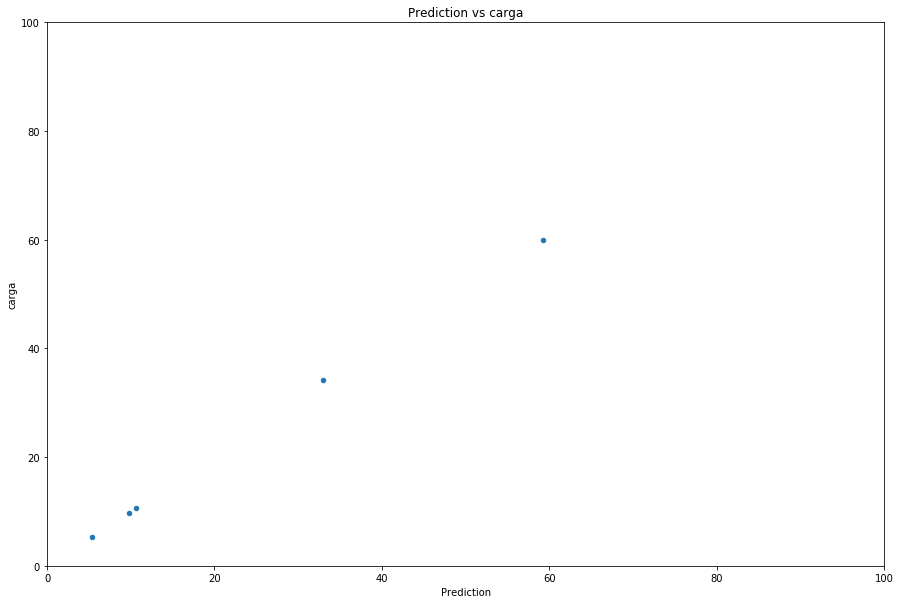

In [77]:
val.loc[:, 'Prediction'] = p
val.plot.scatter(x='Prediction', y='carga', figsize=(15,10), title='Prediction vs carga', 
                 ylim=(0,100), xlim=(0,100))